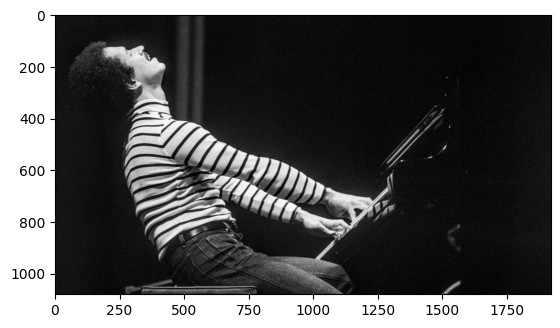

In [52]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('../../data/Keith_Jarrett.jpeg')

plt.imshow(img)

In [53]:
print(img[0][0])

[28 28 28]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


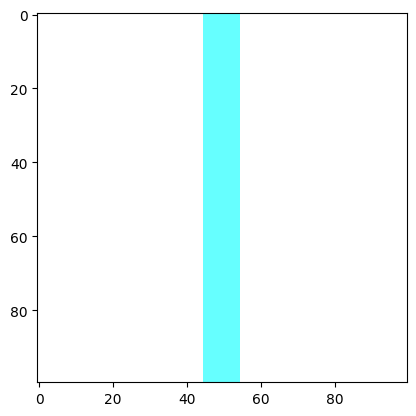

In [56]:
test_img = np.ones((100, 100, 3)) * 100

test_img[:, 45:55, 0] = 0.4

plt.imshow(test_img)

In [67]:
print(img[:,:, 0])

[[28 34 28 ... 14 13 10]
 [25 31 29 ... 20 21 19]
 [22 26 30 ... 16 17 16]
 ...
 [16 18 21 ... 10  7  5]
 [13 16 19 ... 16 12  8]
 [21 24 27 ... 27 21 18]]


In [68]:
vals = np.array(img[:,:, 0])
print(vals)

[[28 34 28 ... 14 13 10]
 [25 31 29 ... 20 21 19]
 [22 26 30 ... 16 17 16]
 ...
 [16 18 21 ... 10  7  5]
 [13 16 19 ... 16 12  8]
 [21 24 27 ... 27 21 18]]


In [70]:
AtA = vals.T @ vals

print(AtA)

[[ 29 183  25 ...  47 244 175]
 [183 233  84 ...  52 195  79]
 [ 25  84 165 ... 255 241 190]
 ...
 [ 47  52 255 ... 123 211 126]
 [244 195 241 ... 211 137 115]
 [175  79 190 ... 126 115 142]]


In [76]:
eigAtA = np.linalg.eig(AtA)

print(eigAtA)

(array([ 2.44871411e+05, -6.44624616e+03,  6.41528997e+03, ...,
        1.42487234e+02,  6.45968077e+01,  6.16905351e+01]), array([[ 2.28976456e-02, -2.12959087e-03,  1.45435901e-02, ...,
        -1.67206002e-03,  7.73221728e-04,  1.83490652e-05],
       [ 2.27001448e-02, -9.45687328e-03,  1.33733769e-02, ...,
         1.61447619e-02,  2.89198668e-03,  9.89148500e-03],
       [ 2.28949784e-02, -9.46449861e-03,  2.55744548e-03, ...,
         4.02742693e-02,  3.64127104e-02, -1.29795654e-02],
       ...,
       [ 2.27137912e-02,  1.42412158e-02, -4.11433016e-02, ...,
        -3.31284122e-02,  1.41440493e-02,  1.43374432e-02],
       [ 2.33826680e-02,  3.25109285e-02, -2.62597165e-02, ...,
        -8.32598874e-03,  6.84336896e-03, -1.39532259e-02],
       [ 2.31297538e-02,  4.78031032e-02,  9.09488227e-03, ...,
        -4.73295779e-02, -9.12823068e-03,  2.48273928e-02]]))


In [78]:
eigValsAtA = eigAtA[0]
diagLambda = np.diag(eigValsAtA)
eigVectorsAtA = eigAtA[1]

[[ 2.44871411e+05  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.44624616e+03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.41528997e+03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.42487234e+02
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   6.45968077e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  6.16905351e+01]]


In [80]:
np.isclose(AtA, eigVectorsAtA @ diagLambda @ eigVectorsAtA.T)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [115]:
Q = V = eigVectorsAtA

In [103]:
U = np.zeros((1080, 1920))

for i in range(0, 1080):
    U[:,i] = (1/  np.sqrt(  np.abs(eigValsAtA[i])   )) * vals @ V[i]


In [122]:
diagLambdaSQRT = np.diag( np.abs(eigValsAtA) )

result = U @ np.sqrt(diagLambdaSQRT) @ V

In [124]:
print(result.shape)

(1080, 1920)


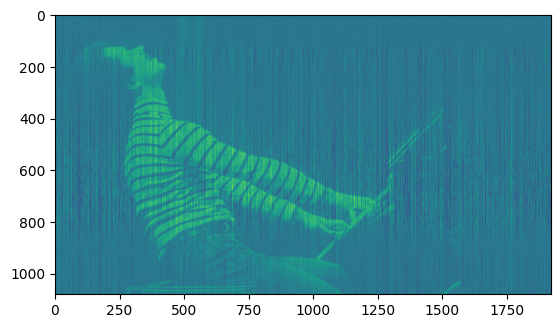

In [125]:
plt.imshow(result)